In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

%matplotlib inline

/Users/snorrealvsvag/Documents/machine_learning/machine-learning_284/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


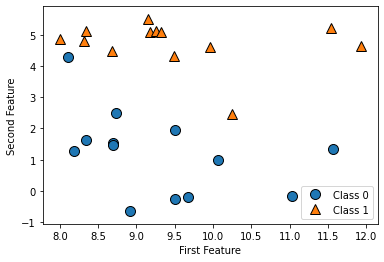

In [2]:
# Generate the dataset
X, y = mglearn.datasets.make_forge()

# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
print('X.shape:', X.shape)

Text(0, 0.5, 'Target')

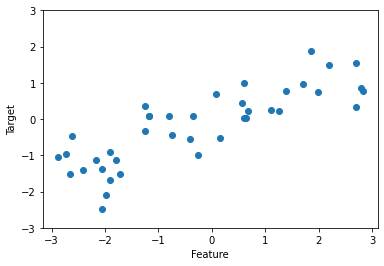

In [3]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer['DESCR'][:210],'\n ...')

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 
 ...


In [6]:
print('Shape of cancer data:', cancer.data.shape)

Shape of cancer data: (569, 30)


In [7]:
# Getting the Sample classes
print('Sample counts per class:\n',
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
# Description of the sematic meaning odf each feature using feature_names attribude:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# The Boston Dataset
from sklearn.datasets import load_boston
boston = load_boston()
print('Data Shape:', boston.data.shape)

Data Shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closet data points in the training dataset--its "nearest neighbors".

### k-Neighbors classification

We start by splitting our data into a training and a test set so we can evaluate generalization performance:

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/snorrealvsvag/Documents/machine_learning/machine-learning_284/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Next we import and instantiate the class. This is where we set parameters like k:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

Furter, we fit the classifier using the traning set. For KNN this means storing the dataset, so we can compute neighbors during prediciton:

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data we cann the predict method. This computes the neighbors:

In [14]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method, with the test data together with the test labels:

In [15]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### Analyzing KNeighborsClassifier

For two-dimensional datasets, we can illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets is view the *decision boundary*, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1. The following visualizes the decision boundaries.

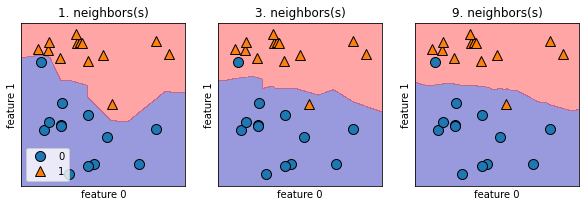

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fir in one line
    
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}. neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
    

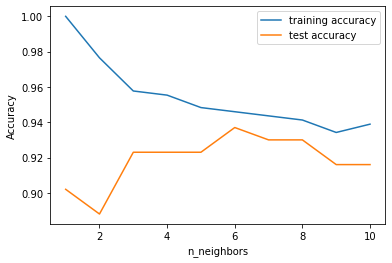

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-neighbors regression

There is a regression variant of the k-nearest neighbors algorithm. Lets start by using the single nearest neighor, this time using the wave dataset.

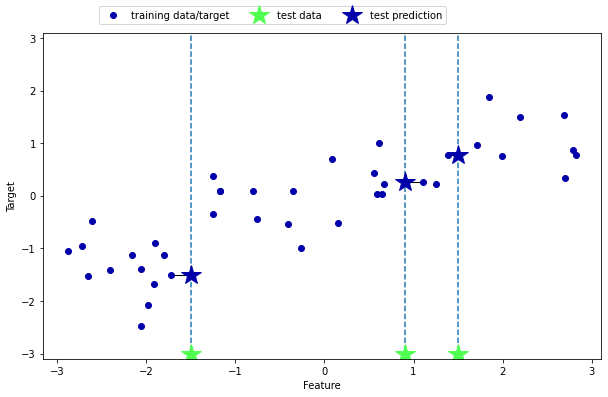

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

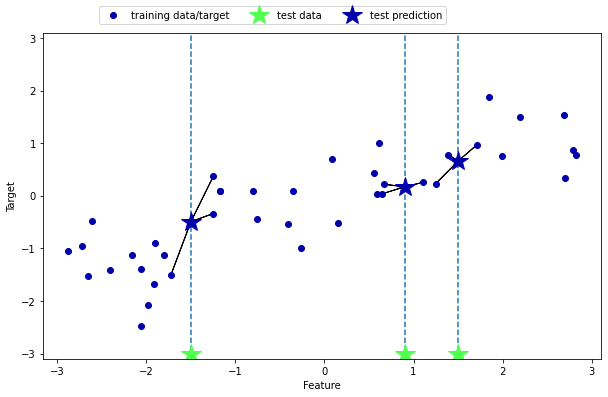

In [19]:
#With mroe neighbors
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# split the wave dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and setting the number of neighbors
reg = KNeighborsRegressor(n_neighbors = 3)
# fit the model using training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
# Making predictions:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [22]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


### Analyzing KNeighborsRegressor
For our one-dimensional dataset, we can see what the predictions look like fro all possible feature values (Figure 2-10). To do this we create a test dataset consisting of many points on ht ex-axis, which corresponds to the single feature:

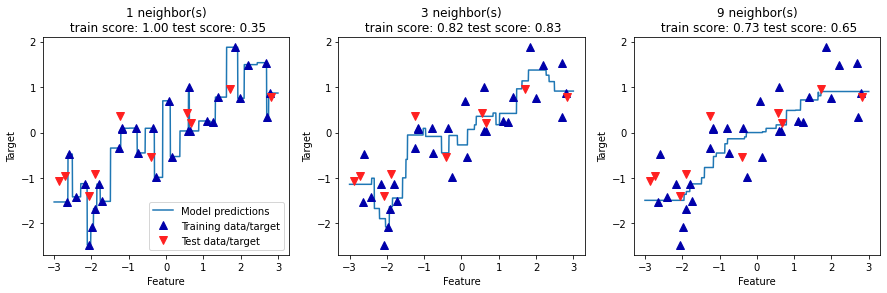

In [23]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# create 1000 datapoints, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax, in zip([1, 3, 9], axes):
    #Making predictions using 1, 3, 9 n_neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
               "Test data/target"], loc="best")

*Comparing predictions made by nearest neighbors regression for different values of n_neighbors*

### KNeighbors classifier: Strengths, weaknesses, and parameters
In principle thers two important paramerets to the KNeighbors Classifier: 
- The number of neighbors
- How you measure distance between data points
In practice using a small number of neighbors like three or five often works well,but should be spesified from example. Choosing the right distance is beyond curiculum, but by default Eucoidean distance is used.

One of the strentghs of the model is that its easy to understand, and gives reasonable performance without a lot of adjustments. kNN is a good baseline method before considering more advanced techniques. Building the model is fast but when training with big datasets prediction can be slow.

Its important to preprocess the data before using Knn.

This approach often does not perform well on **datasets with many features (hundreds or more)** and also works bad with **datasets where most features are 0 most of the time (sparce datasets)**

## 2.3.3 Linear Models
Linear models are a class of models that are widely used in practice and have been studied extensively. Linear models make a prediction using a *linear function* of the input features

### Linear models for regression

For regression, the general prediction formula for a linear model looks like the following:

In [24]:
from IPython.display import display, Math
import sympy as sym
sym.init_printing()
import numpy as np

x,w,b = sym.symbols('x,w,b')

display(Math("\hat{y} = w[0]^{\star} x[0] + w[1]^{\star} x[1]+ ... + w[p]^{\star}x[p]+b"))

<IPython.core.display.Math object>

Here x[0] to x[p] denotes the features, w and b are parameters of the model that are learned, and ^y is the prediction the model makes. For a dataset with a single featrue this is:

In [25]:
display(Math("\hat{y} = w[0]^{\star} x[0] + b"))

<IPython.core.display.Math object>

This is the equation of a line. Lets look at an example: the one dimensional wave dataset.

w[0]: 0.393906  b: -0.031804


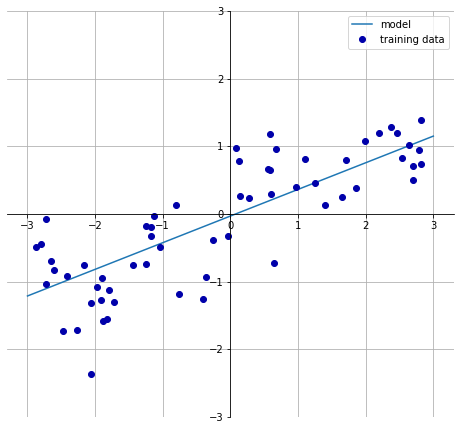

In [26]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for witch the prediction is a line for a single feature, a plane when using two features, or a hyper-plane in the higher dimensions (aka. when using more features).

### Linear regression (aka ordinary least squares)

Linear regression or *ordinary least squares* **(OLS)** is the simplest most classic linear method for regression. Linear regression finds the parameters *w* and *b* that minimize the *mean squared error* between predicions and the true regressor targets, *y*, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples. Linear regression has no parameters, which is a benefit, but it also has no way to control model comlplexity.

Lets recreate the model shown above

In [27]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The `intercept_` attribude is always a single float number, while the `coef_` only has a single entry.

Lets look at the training set and test set performance:

In [29]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An $R^2$ of around $0.66$ is not very good, but we can see that the scores on the training and test sets are very close together. On this one-dmiensional dataset, there is little danger of overfitting as the model is vert restricted (simple). LinearRegression performes much better whne using a more complex dataset, like the Boston Housing dataset with 506 samples and 105 derived features:

In [30]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Even though the training set is good, an $R^2$ of only $0.61$ is a clear sign of overfitting, therefore we must fint a model that lets us control complexity. A good choise: Ridge Regression:

### Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients $(w)$ are chosen not only so that they predict well on the train‐ ing data, but also to fit an additional constraint.

We also want the magnityde of the coeficients to be as small as possible; in other words, all entries of $w$ should be close to zero. Therefore each feature should have as little effect on the outcome as possible (**a small slope**), while still prediction well.

This constraint is called *regularization*, meaning explicitly restricting a model to avoid overfitting. The type of regularization used on ridge regression is known as L2 regularization.

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The results are good, we have a more generalized model which is what we want. The `Ridge` model makes a trade-off between the simplicity of the modek (near-zero coefficients) and its performance on the training set.

How much importance the model places on simplicity versus training set performance can be specified by the user, using the `alpha` parameter. In the previous example, we used the default parameter `alpha=1.0`

The optimum setting of `alpha` depends on the particular dataset we are using. Increasing `alpha` forces coefficients to move more toward zero, which decreases training set performance but might help generalization. A higher `alpha` will restrict the model whilst a lower `alpha` may let the model more loose to improve generalization, see examples below with `alpha = 10` and `alpha = 0.1`

In [33]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can see a simlularity between the LinearRegression model and this model when alpha is lower, we can inspect the coef_ (weight) on the model as we change alpa:

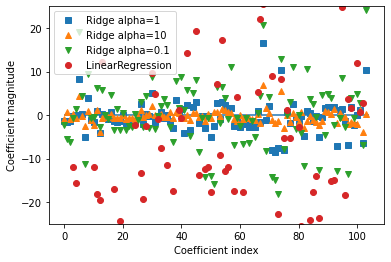

In [35]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. Under is a subsampled Boston Housing dataset evaluated with `Ridge(alpha=1)` and `LinearRegression` respectfully:

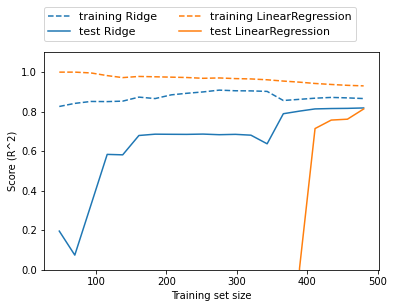

In [36]:
mglearn.plots.plot_ridge_n_samples()

The lesson here is that with **enough train‐ ing data, regularization becomes less important** and given enough data **ridge and linear regression will have the same performance**

### Lasso

An alternative to Ridge for regularizing linear regression is `Lasso`. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. 

The consequence of L1 regularization is that when using the lasso, some coefficients are *exactly zero*. This means some features are entirely ignored by the model. This can be seen as a form of **automatic feature selection**. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

Lets apply it to the Boston Housing dataset:

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features.

`Lasso` has a regularization parameter, `alpha`, that controls how strongly coefficients are pushed toward zero. the default is `alpha = 0` lets decrease it to reduce underfitting. When doing this we also need to increase the default setting of `max_iter` (maximum numbers of iterations to run): 

using `alpha = 0.1` and `max_iter = 100000`

In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Again we can plot the coefficinets tosee the results:

Text(0, 0.5, 'Coefficient magnitude')

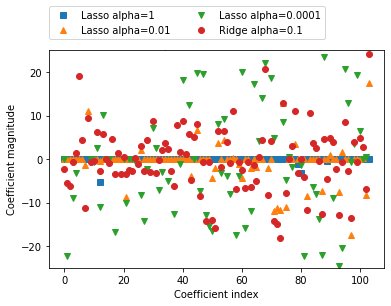

In [39]:
lasso = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

However, if you have a large amount of features and expect only a few of them to be important, `Lasso` might be a better choice. Similarly, if you would like to have a model that is easy to interpret, `Lasso` will provide a model that is easier to understand, as it will select only a subset of the input features. `scikit-learn` also provides the `ElasticNet` class, which combines the penalties of `Lasso` and `Ridge`. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

### Linear models for calssification

Linear models are also extensively used for classification. Let’s look at binary classifi‐ cation first. In this case, a prediction is made using the following formula:

In [40]:
from IPython.display import display, Math
import sympy as sym
sym.init_printing()
import numpy as np

x,w,b = sym.symbols('x,w,b')

display(Math("\hat{y} = w[0]^{\star} x[0] + w[1]^{\star} x[1]+ ... + w[p]^{\star}x[p]+b > 0"))

<IPython.core.display.Math object>

We threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. 

This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients $(w)$ and the intercept $(b)$.

For linear models for classification, the *decision boundary* is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. We will see examples of that in this section.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:
 - The way in which they measure how well a praticular combination of coefficients and intercepts fits the training data
 - If and what kind of regularization the use

The two most common linear classification algorithms are *logistic regression*, implemented in `linear_model.LogisticRegression`, and *linear support vector machines* (linear SVMs), implemented in `svm.LinearSVC` (SVC stands for support vector classifier). Despite its name, `LogisticRegression` is a classification algorithm and not a regression algorithm, and it should not be confused with `LinearRegression`.

Applying `LogisticRegression` and `LinearSVC` models to the `forge` dataset, and visualize the decision boundary as found by the linear models:

/Users/snorrealvsvag/Documents/machine_learning/machine-learning_284/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/snorrealvsvag/Documents/machine_learning/machine-learning_284/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


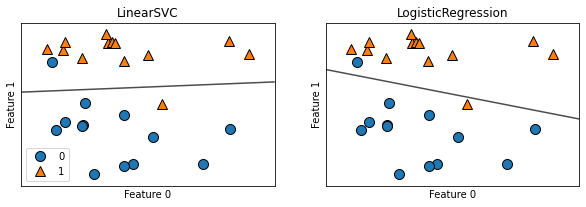

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
axes[0].legend()